In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth',200)

In [16]:
import pandas_datareader as pdr

start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2016-03-01')
spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

In [17]:
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,112.800003,111.389999,112.769997,111.440002,90637900.0,90.310234
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,91.841896
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.084984
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.149803
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.538841


Text(0.5, 1.0, 'SPY')

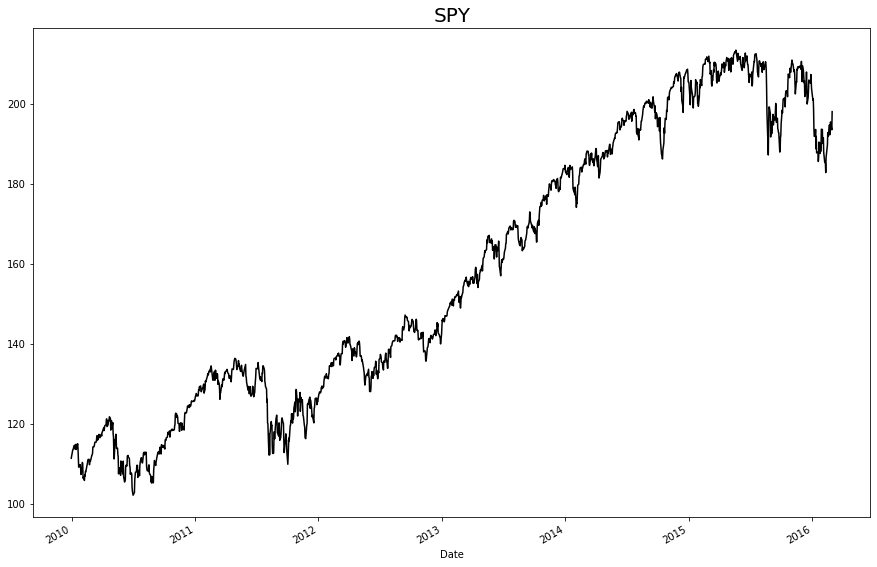

In [18]:
spy_c = spy['Close']

fig, ax = plt.subplots(figsize=(15,10))
spy_c.plot(color='k')
plt.title("SPY", fontsize=20)

In [19]:
first_open = spy['Open'].iloc[0]
first_open

112.7699966430664

In [20]:
last_close = spy['Close'].iloc[-1]
last_close

198.11000061035156

In [21]:
last_close - first_open

85.34000396728516

In [22]:
spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open'])

In [23]:
spy['Daily Change']

Date
2009-12-31   -1.329994
2010-01-04    0.959999
2010-01-05    0.369995
2010-01-06    0.190002
2010-01-07    0.690002
                ...   
2016-02-24    2.569992
2016-02-25    1.809998
2016-02-26   -1.480011
2016-02-29   -1.550003
2016-03-01    3.100006
Name: Daily Change, Length: 1551, dtype: float64

In [24]:
spy['Daily Change'].sum()

42.030174255371094

In [25]:
np.std(spy['Daily Change'])

1.1466111409168578

In [27]:
spy['Overnight Change'] = pd.Series(spy['Open'] - spy['Close'].shift(1))
np.std(spy['Overnight Change'])

0.9535576728834065

In [28]:
spy[spy['Daily Change']<0]['Daily Change'].mean()

-0.9064496137093807

In [29]:
spy[spy['Overnight Change']<0]['Overnight Change'].mean()

-0.6649585617913141

In [37]:
daily_rtn = ((spy['Close'] -spy['Close'].shift(1))/spy['Close'].shift(1))*100
id_rtn = ((spy['Close'] - spy['Open'])/spy['Open'])*100    #intro-day return
on_rtn = ((spy['Open'] - spy['Close'].shift(1))/spy['Close'].shift(1))*100   #overnight return

In [38]:
print(daily_rtn.head())
print(id_rtn.head())
print(on_rtn.head())

Date
2009-12-31         NaN
2010-01-04    1.695979
2010-01-05    0.264710
2010-01-06    0.070406
2010-01-07    0.422129
Name: Close, dtype: float64
Date
2009-12-31   -1.179387
2010-01-04    0.854320
2010-01-05    0.326678
2010-01-06    0.167374
2010-01-07    0.607932
dtype: float64
Date
2009-12-31         NaN
2010-01-04    0.834530
2010-01-05   -0.061766
2010-01-06   -0.096806
2010-01-07   -0.184680
dtype: float64


In [39]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(),3)
    mean_l = round(s[s<0].mean(),3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(),3)
    sd = round(np.std(s),3)
    max_l = round(s.min(),3)
    max_w = round(s.max(),3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n),4)
    cnt = len(s)
    print('Trades:',cnt,\
         '\nwWins:',wins,\
         '\nLosses:',losses,\
         '\nBreakeven:',evens,\
         '\nWin/Loss Ratio',win_r,\
         '\nMean Win:', mean_w,\
         '\nMean Loss:',mean_l,\
         '\nMean',mean_trd,\
         '\nStd Dev:',sd,\
         '\nMax Loss:',max_l,\
         '\nMax Win:',max_w,\
         '\nSharpe Ratio:', sharpe_r)

In [40]:
get_stats(daily_rtn)

Trades: 1550 
wWins: 845 
Losses: 699 
Breakeven: 6 
Win/Loss Ratio 1.209 
Mean Win: 0.692 
Mean Loss: -0.743 
Mean 0.042 
Std Dev: 1.009 
Max Loss: -6.512 
Max Win: 4.65 
Sharpe Ratio: 0.6641


In [41]:
get_stats(id_rtn)

Trades: 1551 
wWins: 851 
Losses: 690 
Breakeven: 10 
Win/Loss Ratio 1.233 
Mean Win: 0.517 
Mean Loss: -0.591 
Mean 0.021 
Std Dev: 0.758 
Max Loss: -4.175 
Max Win: 3.683 
Sharpe Ratio: 0.4307


In [42]:
get_stats(on_rtn)

Trades: 1550 
wWins: 822 
Losses: 720 
Breakeven: 8 
Win/Loss Ratio 1.142 
Mean Win: 0.421 
Mean Loss: -0.437 
Mean 0.021 
Std Dev: 0.63 
Max Loss: -5.227 
Max Win: 4.09 
Sharpe Ratio: 0.5203


In [44]:
# Extend of our analysis
start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2016-03-01')
sp = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

In [47]:
sp

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,147.500000,146.250000,146.843750,146.875000,3172700.0,99.937126
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,98.959030
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,95.089104
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,95.259193
2000-01-06,141.500000,137.750000,139.625000,137.750000,6227200.0,93.728249
...,...,...,...,...,...,...
2016-02-24,193.529999,189.320007,190.630005,193.199997,150812200.0,176.866486
2016-02-25,195.550003,192.830002,193.729996,195.539993,110728300.0,179.008652
2016-02-26,196.679993,194.899994,196.570007,195.089996,129833700.0,178.596695


Text(0.5, 1.0, 'SPY')

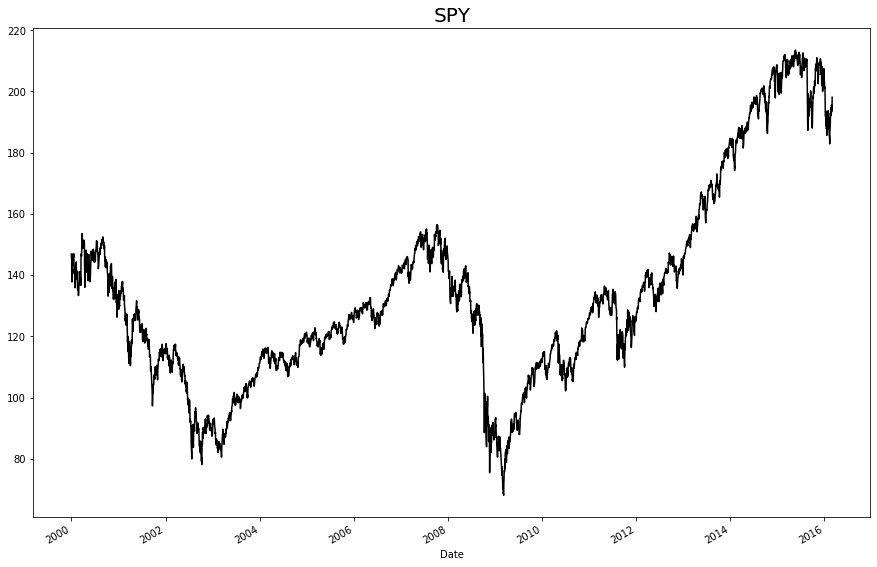

In [48]:
fig ,ax = plt.subplots(figsize=(15,10))
sp['Close'].plot(color='k')
plt.title("SPY",fontsize=20)

In [50]:
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100
long_id_rtn = ((sp['Close'] - sp['Open'])/sp['Open'])*100
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1))/sp['Close'].shift(1))*100

In [51]:
(sp['Close'] - sp['Close'].shift(1)).sum()

51.23500061035156

In [53]:
(sp['Close'] - sp['Open']).sum()

-36.87907409667969

In [54]:
(sp['Open'] - sp['Close'].shift(1)).sum()

88.14532470703125

In [55]:
get_stats(long_day_rtn)

Trades: 4065 
wWins: 2168 
Losses: 1882 
Breakeven: 15 
Win/Loss Ratio 1.152 
Mean Win: 0.819 
Mean Loss: -0.91 
Mean 0.015 
Std Dev: 1.275 
Max Loss: -9.845 
Max Win: 14.52 
Sharpe Ratio: 0.1928


In [56]:
get_stats(long_id_rtn)

Trades: 4066 
wWins: 2129 
Losses: 1908 
Breakeven: 29 
Win/Loss Ratio 1.116 
Mean Win: 0.686 
Mean Loss: -0.766 
Mean -0.0 
Std Dev: 1.051 
Max Loss: -8.991 
Max Win: 8.435 
Sharpe Ratio: -0.0063


In [57]:
get_stats(long_on_rtn)

Trades: 4065 
wWins: 2153 
Losses: 1878 
Breakeven: 34 
Win/Loss Ratio 1.146 
Mean Win: 0.437 
Mean Loss: -0.466 
Mean 0.016 
Std Dev: 0.696 
Max Loss: -8.322 
Max Win: 6.068 
Sharpe Ratio: 0.3592


In [58]:
# Basic Regression Model: Building a model and evaluate its performance
for i in range(1, 21, 1):
    sp.loc[:,'Close Minus' + str(i)] = sp['Close'].shift(i)
    sp20 = sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,]
    
sp20

,Close,Close Minus1,Close Minus2,Close Minus3,Close Minus4,Close Minus5,Close Minus6,Close Minus7,Close Minus8,Close Minus9,...,Close Minus11,Close Minus12,Close Minus13,Close Minus14,Close Minus15,Close Minus16,Close Minus17,Close Minus18,Close Minus19,Close Minus20
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,145.812500,...,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500,146.875000
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,...,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,...,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,...,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,...,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-24,193.199997,192.320007,194.779999,192.000000,192.089996,192.880005,189.779999,186.630005,182.860001,185.270004,...,185.419998,187.949997,191.600006,191.300003,190.160004,193.649994,193.720001,189.110001,188.130005,190.199997
2016-02-25,195.539993,193.199997,192.320007,194.779999,192.000000,192.089996,192.880005,189.779999,186.630005,182.860001,...,185.429993,185.419998,187.949997,191.600006,191.300003,190.160004,193.649994,193.720001,189.110001,188.130005
2016-02-26,195.089996,195.539993,193.199997,192.320007,194.779999,192.000000,192.089996,192.880005,189.779999,186.630005,...,185.270004,185.429993,185.419998,187.949997,191.600006,191.300003,190.160004,193.649994,193.720001,189.110001


In [59]:
sp20 = sp20.iloc[:,::-1]
sp20

,Close Minus20,Close Minus19,Close Minus18,Close Minus17,Close Minus16,Close Minus15,Close Minus14,Close Minus13,Close Minus12,Close Minus11,...,Close Minus9,Close Minus8,Close Minus7,Close Minus6,Close Minus5,Close Minus4,Close Minus3,Close Minus2,Close Minus1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,146.875000,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,...,145.812500,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500
2000-02-01,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,...,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500
2000-02-02,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,...,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500
2000-02-03,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,...,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500
2000-02-04,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,...,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-24,190.199997,188.130005,189.110001,193.720001,193.649994,190.160004,191.300003,191.600006,187.949997,185.419998,...,185.270004,182.860001,186.630005,189.779999,192.880005,192.089996,192.000000,194.779999,192.320007,193.199997
2016-02-25,188.130005,189.110001,193.720001,193.649994,190.160004,191.300003,191.600006,187.949997,185.419998,185.429993,...,182.860001,186.630005,189.779999,192.880005,192.089996,192.000000,194.779999,192.320007,193.199997,195.539993
2016-02-26,189.110001,193.720001,193.649994,190.160004,191.300003,191.600006,187.949997,185.419998,185.429993,185.270004,...,186.630005,189.779999,192.880005,192.089996,192.000000,194.779999,192.320007,193.199997,195.539993,195.089996


In [60]:
from sklearn.svm import SVR

clf = SVR(kernel='linear')
X_train = sp20[:-1000]
y_train = sp20['Close'].shift(-1)[:-1000]
X_test = sp20[-1000:]
y_test = sp20['Close'].shift(-1)[-1000:]

In [61]:
model = clf.fit(X_train, y_train)
preds = model.predict(X_test)

In [62]:
tf = pd.DataFrame(list(zip(y_test, preds)),columns=['Next Day Close','Predicted Next Close'], index=y_test.index)
tf

,Next Day Close,Predicted Next Close
Date,,
2012-03-09,137.580002,137.688067
2012-03-12,140.059998,137.912431
2012-03-13,139.910004,139.953595
2012-03-14,140.720001,139.946211
2012-03-15,140.300003,140.694105
...,...,...
2016-02-24,195.539993,192.532105
2016-02-25,195.089996,195.218851
2016-02-26,193.559998,195.152803


In [65]:
# Model performance
cdc = sp[['Close']].iloc[-1000:]
ndo = sp[['Open']].iloc[-1000:].shift(-1)
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2012-03-09,137.580002,137.688067,137.570007,137.550003
2012-03-12,140.059998,137.912431,137.580002,138.320007
2012-03-13,139.910004,139.953595,140.059998,140.100006
2012-03-14,140.720001,139.946211,139.910004,140.119995
2012-03-15,140.300003,140.694105,140.720001,140.360001
...,...,...,...,...
2016-02-24,195.539993,192.532105,193.199997,193.729996
2016-02-25,195.089996,195.218851,195.539993,196.570007
2016-02-26,193.559998,195.152803,195.089996,195.110001


In [75]:
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open']:
        return 0
    else:
        return 1

def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open'])*100
    else:
        return 0

In [76]:
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2012-03-09,137.580002,137.688067,137.570007,137.550003,0,0.000000
2012-03-12,140.059998,137.912431,137.580002,138.320007,1,1.257945
2012-03-13,139.910004,139.953595,140.059998,140.100006,1,-0.135619
2012-03-14,140.720001,139.946211,139.910004,140.119995,1,0.428209
2012-03-15,140.300003,140.694105,140.720001,140.360001,0,0.000000
...,...,...,...,...,...,...
2016-02-24,195.539993,192.532105,193.199997,193.729996,1,0.934289
2016-02-25,195.089996,195.218851,195.539993,196.570007,1,-0.752918
2016-02-26,193.559998,195.152803,195.089996,195.110001,0,0.000000


In [79]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

32.370208740234375

In [80]:
(sp['Close'].iloc[-1000:] - sp['Open'].iloc[-1000:]).sum()

30.560203552246094

In [82]:
get_stats((sp['Close'].iloc[-1000:] - sp['Open'].iloc[-1000:])/sp['Open'].iloc[-1000]*100)

Trades: 1000 
wWins: 546 
Losses: 448 
Breakeven: 6 
Win/Loss Ratio 1.219 
Mean Win: 0.59 
Mean Loss: -0.67 
Mean 0.022 
Std Dev: 0.863 
Max Loss: -5.943 
Max Win: 3.809 
Sharpe Ratio: 0.4095


In [83]:
get_stats(tf2['PnL'])

Trades: 999 
wWins: 279 
Losses: 212 
Breakeven: 508 
Win/Loss Ratio 1.316 
Mean Win: 0.453 
Mean Loss: -0.501 
Mean 0.02 
Std Dev: 0.462 
Max Loss: -4.175 
Max Win: 1.947 
Sharpe Ratio: 0.6933


In [84]:
# Rewrite the strategy in modified signal
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1:
        return 1
    else:
        return 0

def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open'])*100
    else:
        return 0
    
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2012-03-09,137.580002,137.688067,137.570007,137.550003,0,0.0
2012-03-12,140.059998,137.912431,137.580002,138.320007,0,0.0
2012-03-13,139.910004,139.953595,140.059998,140.100006,0,0.0
2012-03-14,140.720001,139.946211,139.910004,140.119995,0,0.0
2012-03-15,140.300003,140.694105,140.720001,140.360001,0,0.0
...,...,...,...,...,...,...
2016-02-24,195.539993,192.532105,193.199997,193.729996,0,0.0
2016-02-25,195.089996,195.218851,195.539993,196.570007,0,0.0
2016-02-26,193.559998,195.152803,195.089996,195.110001,0,0.0


In [85]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

-4.8000946044921875

In [86]:
get_stats(tf2['PnL'])

Trades: 1000 
wWins: 58 
Losses: 52 
Breakeven: 890 
Win/Loss Ratio 1.115 
Mean Win: 0.565 
Mean Loss: -0.668 
Mean -0.002 
Std Dev: 0.258 
Max Loss: -1.966 
Max Win: 2.756 
Sharpe Ratio: -0.1216


In [89]:
# Redo the process

X_train = sp20[:-2000]
y_train = sp20['Close'].shift(-1)[:-2000]
X_test = sp20[-2000:-1000]
y_test = sp20['Close'].shift(-1)[-2000:-1000]

model = clf.fit(X_train, y_train)
preds = model.predict(X_test)

tf = pd.DataFrame(list(zip(y_test, preds)),columns=['Next Day Close','Predicted Next Close'], index=y_test.index)
cdc = sp[['Close']].iloc[-2000:-1000]
ndo = sp[['Open']].iloc[-2000:-1000].shift(-1)
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1:
        return 1
    else:
        return 0

def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open'])*100
    else:
        return 0
    
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))

(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

-40.73003387451172

In [90]:
(sp['Close'].iloc[-2000:-1000] - sp['Open'].iloc[-2000:-1000]).sum()

-7.090003967285156

In [102]:
# Modeling with Dynamic Time Warping Strategy
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [103]:
def dtw_dist(x,y):
    distance , path = fastdtw(x, y, dist=euclidean)
    return distance

In [104]:
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = sp['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))

In [105]:
tseries[0]

(array([-0.9787234 , -3.91061453,  0.17889088, -1.60714286]),
 5.807622504537213)

In [106]:
dist_pairs = []

for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1],tseries[j][1]))

In [107]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist','A Ret','B Ret'])
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)
sfe = sf[sf['A']<sf['B']]

In [108]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]
winf

,A,B,Dist,A Ret,B Ret
844,1,33,0.625450,1.357759,0.102564
4119,5,60,0.819447,0.585849,2.034602
18014,22,151,0.730118,0.211372,-0.032236
18496,22,633,0.738642,0.211372,0.501370
21210,26,99,0.899150,0.980597,-1.465515
...,...,...,...,...,...
612208,753,773,0.631290,0.322471,0.291242
617069,759,762,0.852019,1.065334,-0.421561
617072,759,765,0.846496,1.065334,-1.465383
617880,760,761,0.977724,0.009521,-0.084978


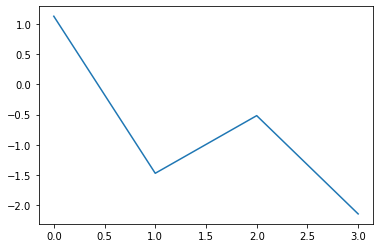

In [113]:
plt.plot(np.arange(4), tseries[6][0])

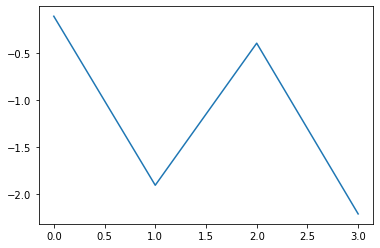

In [114]:
plt.plot(np.arange(4),tseries[598][0])

In [111]:
excluded = {}
return_list = []

def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret']<0:
            excluded.update({r['A']:1})

winf.apply(get_returns, axis=1)

844       None
4119      None
18014     None
18496     None
21210     None
          ... 
612208    None
617069    None
617072    None
617880    None
623571    None
Length: 2150, dtype: object

In [112]:
get_stats(pd.Series(return_list))

Trades: 430 
wWins: 223 
Losses: 207 
Breakeven: 0 
Win/Loss Ratio 1.077 
Mean Win: 0.468 
Mean Loss: -0.522 
Mean -0.009 
Std Dev: 0.67 
Max Loss: -2.753 
Max Win: 2.682 
Sharpe Ratio: -0.21
